In [3]:
def DESCENDING_CORRELATION_VISUALIZATION(df, features, target):
    corr_features_all = [target] + features

    corr_with_target = df[corr_features_all].corr()[[target]].drop(target).sort_values(target, ascending=False)

    sns.heatmap(
        corr_with_target,
        annot=True,
        cmap="coolwarm",
        center=0,
        cbar_kws={"shrink": 0.8}
    )

    plt.title("Correlation Between Features and Target target")
    plt.tight_layout()
    # plt.savefig("correlation between target and (all) features_1.png")
    plt.show()


In [1]:
# packages
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report
from collections import Counter
from imblearn.under_sampling import RandomUnderSampler
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter

In [ ]:
import sys
import os
sys.path.insert(0, os.path.abspath('..'))

# ML models (SVM, random forest, naïve bayes, logistic regression)
from Models.ML.RandomForest import RandomForestPipeline


In [ ]:
# dataset
file_path = '../datasets/amazon_user_reviews_features_sentiment.parquet'
df = pd.read_parquet(file_path)

# features and target
features = ['exclamation_count', 'question_count', 'word_count', 'uppercase_ratio',
       'avg_word_length', 'helpful_vote', 'int_verified_purchase', 'hour',
       'month']
target = "sentiment"

Balanced: every cateogry 600 in total, 200 per category (neg(0):1-2, neu(1):3, pos(0):4-5)
Counter({0: 6179, 2: 6135, 1: 6086})


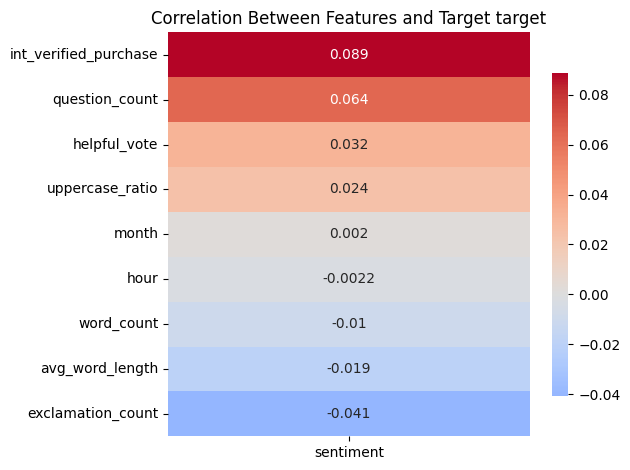

ML: Random Forest
Original Class Distribution: Counter({0: 6179, 2: 6135, 1: 6086})
Training set size: 14720
Test set size: 3680
Model training completed!
Predictions completed!
MODEL EVALUATION METRICS
Accuracy:  0.4019
Precision: 0.4022
Recall:    0.4019
F1-Score:  0.4020

CLASSIFICATION REPORT
              precision    recall  f1-score   support

           0       0.43      0.42      0.43      1243
           1       0.39      0.40      0.40      1209
           2       0.38      0.38      0.38      1228

    accuracy                           0.40      3680
   macro avg       0.40      0.40      0.40      3680
weighted avg       0.40      0.40      0.40      3680



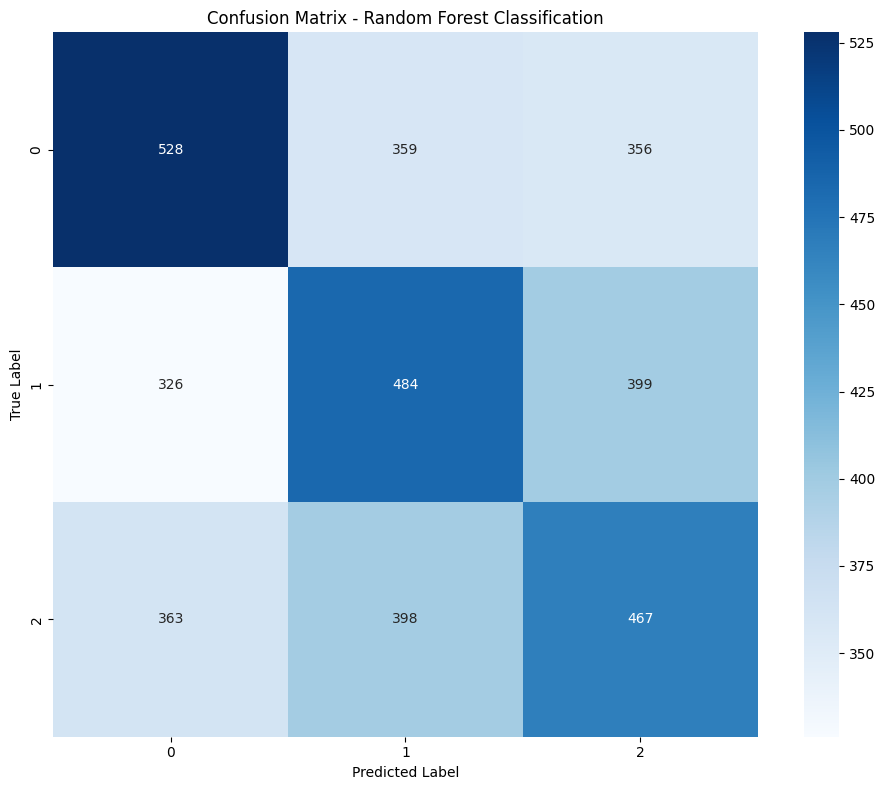

DL: LSTM
Starting LSTM Classification Pipeline

[Step 1] Preprocessing data...
Word Index (first 20): {'br': 1, 'one': 2, 'like': 3, 'would': 4, 'good': 5, 'get': 6, 'use': 7, 'great': 8, 'time': 9, 'work': 10, 'really': 11, 'love': 12, 'well': 13, 'also': 14, 'much': 15, 'make': 16, 'even': 17, 'product': 18, 'book': 19, 'little': 20}
Sequences (first 3): [[155, 185, 80, 4, 1072, 1448], [1955, 891, 3950, 1845, 687, 1316, 98], [1983, 504, 40, 667, 438, 200, 3681, 737, 4926, 47, 3, 36, 438, 182, 65, 333, 21, 1, 1, 1073, 120, 43, 534, 516]]
Padded Sequences shape: (18400, 10)
One-hot Encoded Labels shape: (18400, 3)
X_train shape: (12328, 10), y_train shape: (12328, 3)
X_test shape: (6072, 10), y_test shape: (6072, 3)
✓ Data preprocessing completed

[Step 2] Building LSTM model...
Model Summary:


/Users/yifeicao/Library/Python/3.13/lib/python/site-packages/keras/src/layers/core/embedding.py:100: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding (Embedding)           │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm (LSTM)                     │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ ?                      │   0 (unbuilt) │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

✓ Model built successfully

[Step 3] Training model...
Epoch 1/20


In [ ]:
# Balanced: every cateogry 600 in total, 200 per category (neg(0):1-2, neu(1):3, pos(0):4-5)


print("Balanced: every cateogry 600 in total, 200 per category (neg(0):1-2, neu(1):3, pos(0):4-5)")
print(Counter(df["sentiment"]))


# Correlation Visualizaion

DESCENDING_CORRELATION_VISUALIZATION(df, features, target)

# Regular ML: Random Forest Test
print("ML: Random Forest")
y = df[target]
X = df[features]

rf_pipeline = RandomForestPipeline(features=features, test_size=0.2, random_state=42, n_estimators=100)
rf_pipeline.run_pipeline(X, y)

